## Coleta e unificação dos datasets Fake.br-Corpus e FakeWhatsApp.Br

In [38]:
# Importação de bibliotecas utilizadas no pré-processamento
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pt_core_news_sm
from IPython.display import display
%matplotlib inline
pd.set_option("display.max_rows", 50, 'display.max_colwidth', 0)

### Baixar os dados do [Fake.br-Corpus](https://github.com/roneysco/Fake.br-Corpus)

In [2]:
!git clone https://github.com/roneysco/Fake.br-Corpus

Cloning into 'Fake.br-Corpus'...
remote: Enumerating objects: 28763, done.
remote: Total 28763 (delta 0), reused 0 (delta 0), pack-reused 28763
Receiving objects: 100% (28763/28763), 37.10 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (14129/14129), done.
Checking out files: 100% (21602/21602), done.


### Carregando os dados

Vou utilizar a amostra "full_texts" do Corpus para realizar novo processamento e limpeza dos dados conforme as novas hipóteses propostas.

In [43]:
DADOS_CAMINHO = "./Fake.br-Corpus/full_texts"

def load_txts(path):
    txts = []
    for filename in sorted(os.listdir(path), key=lambda x: int(re.match("[0-9]+", x).group())):
        with open(os.path.join(path, filename)) as f:
            txts.append(f.read())
    return [txt.rstrip() for txt in txts]

true_txts = load_txts(os.path.join(DADOS_CAMINHO, "true"))
fake_txts = load_txts(os.path.join(DADOS_CAMINHO, "fake"))

#confere se tem a mesma quantidade (dataset é balanceado)
assert(len(true_txts) == len(fake_txts))

dados = pd.DataFrame(
    [{"texto": t, "classe": 0} for t in true_txts] \
         + [{"texto": f, "classe": 1}  for f in fake_txts]
)
display(dados[dados['texto'].str.len()<400].sample(n=5)[['classe', 'texto']])

,classe,texto
5204,1,Edson Fachin é o novo relator da Lava Jato. .
4826,1,"Paulo Henrique Amorim: ""Aécio Neves é um gangster filhinho de papai"". ""É provável que o Marcola e o Fernandinho Beira-Mar tenham uma linguagem mais elevada que Aécio"". (*** dessa vez temos que tirar o chapéu para PHA ***) PHA, que é petista de carteirinha e já possui diversos processos no ""lombo"", soltou o verbo contra o senador Aécio Neves:"
6876,1,"Você acredita em premonição? O último depoimento de um dos integrantes do grupo Mamonas Assassinas. A NOTÍCIA DO ACIDENTE. Doze horas após a declaração da suposta premonição, a aeronave que levaria o grupo para um show em Brasília se chocou contra a Serra da Cantareira, matando todos os integrantes do grupo"
4694,1,"Site O Antagonista ""mata"" Caetano Veloso. A intenção da postagem feita pelo Antagonista era chamar atenção para uma possível candidatura de Joaquim Barbosa. Com o título "" ... o Brasil está preparado para ter um presidente negro? "" a matéria teve um detalhe curioso: Mataram Caetano Veloso! Aos 74 anos, o músico petista goza de plena saúde e não pensa em morrer tão cedo! confira no print abaixo:"
7056,1,"Ex-marido de Dilma: ""A gente assaltava bancos e roubava quartéis para pegar armas. Era muito romântico"". Segundo Araújo, o grupo praticou assaltos a banco, roubos de caminhões de carne, além de ""ações em quarteis"" para ""pegar armas"".."


### Exploração e limpeza de dados

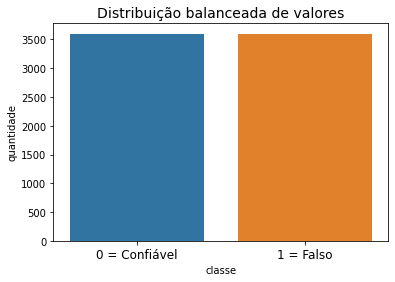

In [44]:
ax = sns.countplot(x="classe", data=dados)
ax.set_xticklabels(["0 = Confiável", "1 = Falso"], fontsize=12)
ax.set_title('Distribuição balanceada de valores', fontsize=14)
ax.set_ylabel('quantidade')
plt.show()

In [84]:
display(dados[dados['texto'].str.len()<400].sample(n=5)[['classe', 'texto', 'texto_limpo']])

,classe,texto,texto_limpo
5485,1,"CONTRASTE: Enquanto manifestantes e PM se confrontavam, engravatados se divertiam em um regabofe. . Do lado de dentro: Um divertido coquetel acontecia nas dependências da Câmara dos Deputados. Do lado de fora: A PM confrontava manifestantes. A foto de Gisele Arthur resume o que acontece em nosso país.","CONTRASTE: Enquanto manifestantes e PM se confrontavam, engravatados se divertiam em um regabofe. . Do lado de dentro: Um divertido coquetel acontecia nas dependências da Câmara dos Deputados. Do lado de fora: A PM confrontava manifestantes. A foto de Gisele Arthur resume o que acontece em nosso país."
5192,1,"Repórter pergunta para Dória se dá para construir um diálogo com pichadores: ""Não negocio com bandidos"". Dória participou de uma sabatina na CBN (leia-se Globo) com duas jornalistas. Elas bem que tentaram induzir o prefeito com algumas perguntas capiciosas. Bem, o resultado você assiste no vídeo abaixo: ""Não vou negociar com pichadores. Não negocio com bandidos"" disse o prefeito de SP","Repórter pergunta para Dória se dá para construir um diálogo com pichadores: ""Não negocio com bandidos"". Dória participou de uma sabatina na CBN (leia-se Globo) com duas jornalistas. Elas bem que tentaram induzir o prefeito com algumas perguntas capiciosas. Bem, o resultado você assiste no vídeo abaixo: ""Não vou negociar com pichadores. Não negocio com bandidos"" disse o prefeito de SP"
4781,1,"Na surdina? Deputados tentaram votar reajuste para servidores federais na madrugada. . Enquanto não há dinheiro para pagar os pobres velhinhos que recebem apenas 1 salário mínimo de aposentadoria, a Câmara dos Deputados faz sua parte [...] só que faz ao contrário.","Na surdina? Deputados tentaram votar reajuste para servidores federais na madrugada. . Enquanto não há dinheiro para pagar os pobres velhinhos que recebem apenas 1 salário mínimo de aposentadoria, a Câmara dos Deputados faz sua parte [...] só que faz ao contrário."
4642,1,"A deselegância de Zezé: ""Passar a mulher da gente pra trás é fácil, difícil é passar para frente"". . Em uma entrevista exibida no programa de Danilo Gentili, o sertanejo soltou mais uma: "" Passar a mulher da gente pra trás é fácil, difícil é passar para frente"". Calma Zezé! Dinheiro não é tudo. Essa sua deselegância só demonstra uma coisa: insegurança total! leia também:","A deselegância de Zezé: ""Passar a mulher da gente pra trás é fácil, difícil é passar para frente"". . Em uma entrevista exibida no programa de Danilo Gentili, o sertanejo soltou mais uma: "" Passar a mulher da gente pra trás é fácil, difícil é passar para frente"". Calma Zezé! Dinheiro não é tudo. Essa sua deselegância só demonstra uma coisa: insegurança total! leia também:"
4559,1,"Cantora Elza Soares (80 anos) era um dos passageiros do avião que pegou fogo no ar: ""Fiquei paralisada"". O incidente aconteceu na madrugada da última sexta-feira (4) durante um voo da empresa American Airlines.","Cantora Elza Soares (80 anos) era um dos passageiros do avião que pegou fogo no ar: ""Fiquei paralisada"". O incidente aconteceu na madrugada da última sexta-feira (4) durante um voo da empresa American Airlines."


In [103]:
texto = "campo [...] e resolveu. \n. estender  ... \\nDilma, ator Otávio Augusto entra no páreo"
#texto = texto.replace('\.\w\s', ' ') 
print(texto)

campo [...] e resolveu.  . estender  ...  Dilma, ator Otávio Augusto entra no páreo


In [ ]:
# Salva dados para uso no notebook do próximo passo.
os.makedirs("dados/", exist_ok=True)
dados.to_csv('dados/datasets_unificados.csv', sep = ',', index = True)